In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and read dataset
df = pd.read_csv('Mall_Customers1.csv')

In [3]:
# Display first few rows of the dataset
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### Data Preprocessing

In [4]:
# Check the dimensions of the dataset
print("Dataset dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset dimensions:
Number of rows: 200
Number of columns: 5


In [5]:
# Display the column names
print("Column names:")
print(df.columns)

Column names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
# Check the data types of each column
print("Data types:")
print(df.dtypes)

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [7]:
# # Convert 'Gender' column to binary values (1 for Male, 0 for Female)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}) 

In [8]:
# Check null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Summary statistics of the dataset
print("Summary statistics:")
print(df.describe())

Summary statistics:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [10]:
# Information about null values and Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [11]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df['Annual Income (k$)'], 25)
Q3 = np.percentile(df['Annual Income (k$)'], 75)
IQR = Q3 - Q1

# Define lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Annual Income (k$)'] < lower_threshold) | (df['Annual Income (k$)'] > upper_threshold)]

# Remove outliers
df = df[~((df['Annual Income (k$)'] < lower_threshold) | (df['Annual Income (k$)'] > upper_threshold))]

# Print the outliers
print("Outliers in Annual Income:")
print(outliers)

Outliers in Annual Income:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199       1   32                 137                      18
199         200       1   30                 137                      83


In [12]:
# Drop Customer id column 
df.drop(['CustomerID'], axis=1,inplace=True)


In [13]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [14]:
# Checking missing values
print("Missing values:")
missing_values = df.isnull().sum()
print(missing_values,"\n")
if missing_values.sum() == 0:
    print("No missing values are present")
else:
    print(missing_values)


Missing values:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

No missing values are present


In [15]:
# Check the dimensions of the dataset
print("Dataset dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset dimensions:
Number of rows: 198
Number of columns: 4


In [16]:
# Summary statistics of the dataset
print("Summary statistics:")
print(df.describe())

Summary statistics:
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  198.000000  198.000000          198.000000              198.000000
mean     0.434343   38.929293           59.787879               50.196970
std      0.496927   14.016852           25.237259               25.746846
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.250000           40.500000               35.000000
50%      0.000000   36.000000           61.000000               50.000000
75%      1.000000   49.000000           77.750000               72.750000
max      1.000000   70.000000          126.000000               99.000000


## Exploratory Data Analysis

### Univariate Analysis

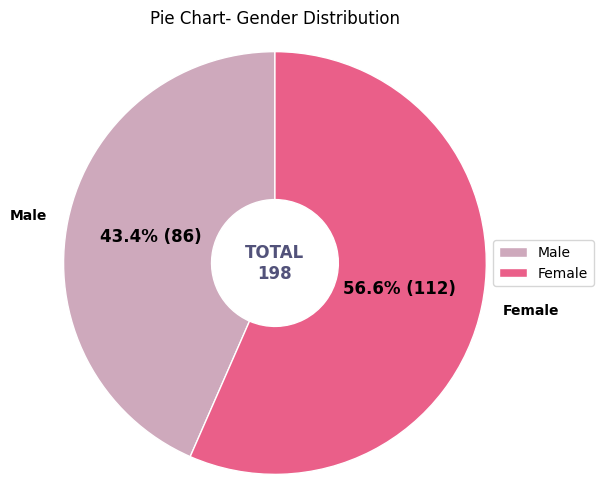

In [17]:
male_count = df[df['Gender'] == 1].shape[0]
female_count = df[df['Gender'] == 0].shape[0]
total_count = df.shape[0]

sizes = [male_count, female_count]
labels = ['Male', 'Female']
colors = ['#cea9bc', '#EA5F89']

fig, ax = plt.subplots(figsize=(6, 6))

wedges, _, autotexts = ax.pie(sizes,
                              labels=labels,
                              autopct=lambda pct: f'{pct:.1f}% ({pct/100*total_count:.0f})',
                              startangle=90,
                              colors=colors,
                              textprops={'color': 'black', 'weight': 'bold'},
                              wedgeprops={'width': 0.7, 'edgecolor': 'white'})

ax.legend(wedges, labels, loc='center right', bbox_to_anchor=(0.7, 0, 0.5, 1))

ax.text(0, 0, f"TOTAL\n{total_count}", weight='bold', size=12, color='#52527a', ha='center', va='center')
plt.title("Pie Chart- Gender Distribution")
plt.setp(autotexts, size=12, weight='bold')
ax.axis('equal')  # equal aspect ratio

plt.show()


In this pie chart shows the there are slightly more females customers than male.(112 vs 86).Females are 56.6% of total customers.

Text(45, 22, 'Mean age: 38.10 ')

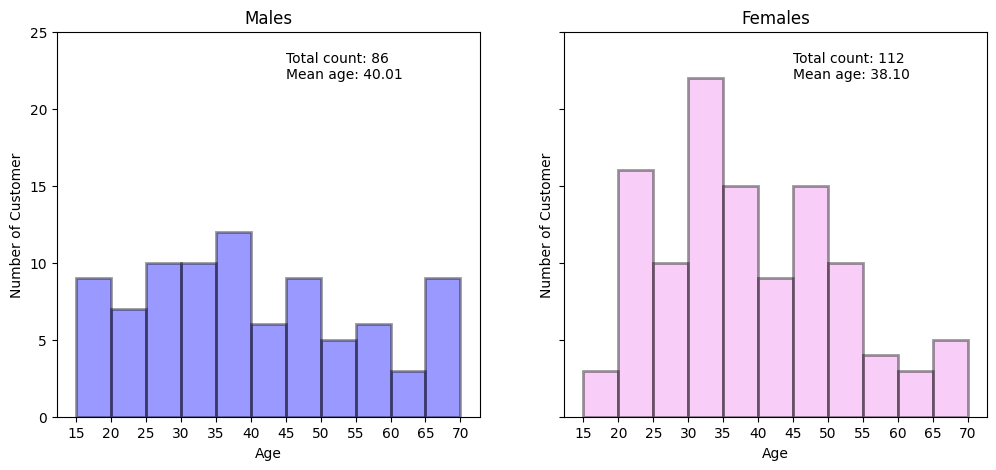

In [18]:
males_age = df[df['Gender']==1]['Age']
females_age = df[df['Gender']==0]['Age']

age_bins = range(15,75,5)

# males histrogram
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='Blue', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Number of Customer')
ax1.text(45, 23, f"Total count: {males_age.count()} ")
ax1.text(45, 22, f"Mean age: {males_age.mean():.2f} ")

# Females histrogram
sns.distplot(females_age, bins=age_bins, kde=False, color='Violet', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Number of Customer')
ax2.text(45, 23, f"Total count: {females_age.count()} ")
ax2.text(45, 22, f"Mean age: {females_age.mean():.2f} ")

In [19]:
print(f'Kolgomorov-Smirnov test p-value: {stats.ks_2samp(males_age, females_age)[1]: .2f}')

Kolgomorov-Smirnov test p-value:  0.44


The histrograms shows that the average age of males customers is slightly higher than females (40.01 vs 38.10) and also distribution of male age is more uniforn than females. where we can observe that  the biggest age group is 35-40 years old.  the P-value of 0.44 suggests that there is no significant difference in the age distribution between males and females based on the Kolmogorov-Smirnov test.

Text(0.5, 1.0, 'Boxplot of annual income')

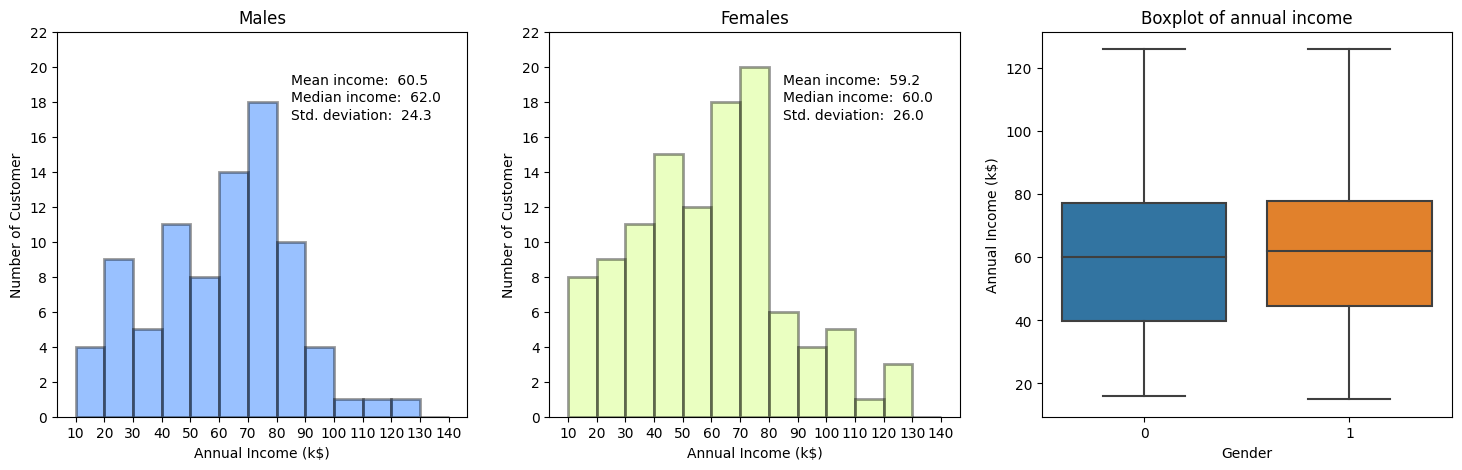

In [20]:
males_income =df[df['Gender']==1]['Annual Income (k$)']
females_income =df[df['Gender']==0]['Annual Income (k$)']

my_bins = range(10,150,10)

# males histrogram
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Number of Customer')
ax1.text(85, 19, f"Mean income: {males_income.mean(): .1f} ")
ax1.text(85, 18, f"Median income: {males_income.median(): .1f} ")
ax1.text(85, 17, f"Std. deviation: {males_income.std(): .1f} ")

# females histrogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#ccff66', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Number of Customer')
ax2.text(85, 19, f"Mean income: {females_income.mean(): .1f} ")
ax2.text(85, 18, f"Median income: {females_income.median(): .1f} ")
ax2.text(85, 17, f"Std. deviation: {females_income.std(): .1f} ")

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, ax=ax3)
ax3.set_title("Boxplot of annual income")

In [21]:
print(f'Kolgomorov-Smirnov test p-value: {stats.ks_2samp(males_income, females_income)[1]: .2f}')

Kolgomorov-Smirnov test p-value:  0.91


These histrograms shows that mean income of males is highter than females(62.2k$ vs 59.2k$). Also meadian income of male customers is higher than female(62.5k$ vs 60.0k$). Standard deviation is similar for both groups. 
Box plot shows that there is no outlier presnet.The p-value of 0.91 obtained from the Kolmogorov-Smirnov (KS) test suggests that there is no significant evidence to reject the null hypothesis, so there is no significant difference in the income distributions of males and females.

Text(0.5, 1.0, 'Boxplot of spending score')

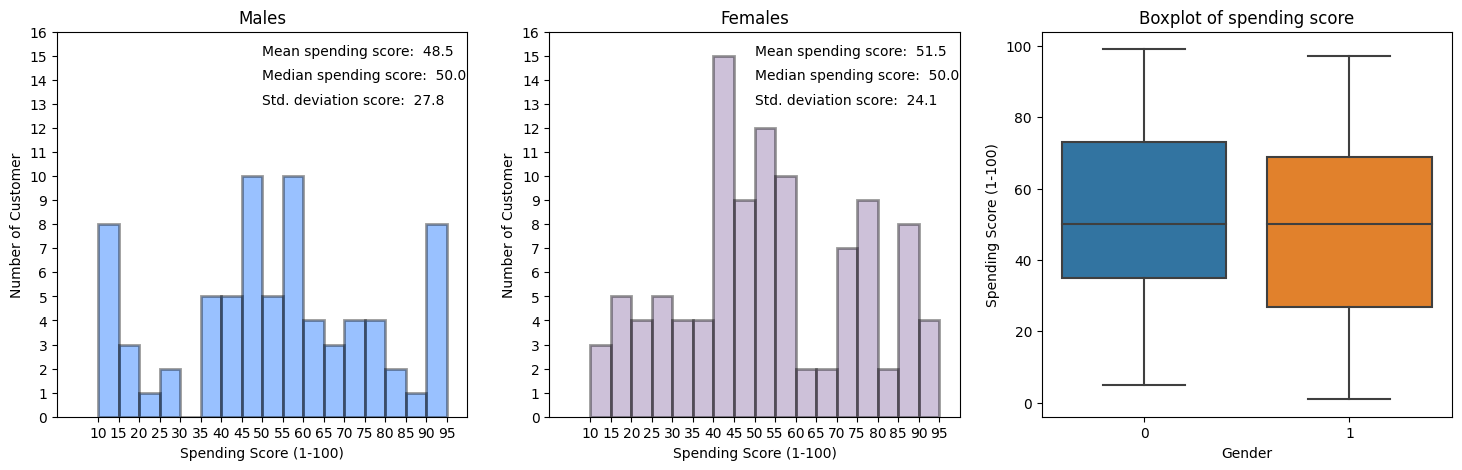

In [22]:
males_spending =df[df['Gender']==1]['Spending Score (1-100)']
females_spending =df[df['Gender']==0]['Spending Score (1-100)']

spending_bins = range(10,100,5)

# males histrogram
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Number of Customer')
ax1.text(50, 15, f"Mean spending score: {males_spending.mean(): .1f} ")
ax1.text(50, 14, f"Median spending score: {males_spending.median(): .1f} ")
ax1.text(50, 13, f"Std. deviation score: {males_spending.std(): .1f} ")

# females histrogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#8464a0', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Number of Customer')
ax2.text(50, 15, f"Mean spending score: {females_spending.mean(): .1f} ")
ax2.text(50, 14, f"Median spending score: {females_spending.median(): .1f} ")
ax2.text(50, 13, f"Std. deviation score: {females_spending.std(): .1f} ")

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=ax3)
ax3.set_title("Boxplot of spending score")

In [23]:
print(f'Kolgomorov-Smirnov test p-value: {stats.ks_2samp(males_spending, females_spending)[1]: .2f}')

Kolgomorov-Smirnov test p-value:  0.26


These histrograms shows that a mean spending score of females(51.5) is higher than males(48.5). The K-S test p_value indicates that there is no evidence to reject null hypothesis. However, there is no significant difference in the spending distributions of males and females.

### Bivariate Analyssis

In [24]:
# Age groups
age_bins = range(15,75,5) 
df['Age_group'] = pd.cut(df['Age'], age_bins)

In [25]:
df.Age_group.isnull().sum()

0

In [26]:
# Replace NaN values with mode in the 'Age_group' column
# df['Age_group'].fillna(df['Age_group'].mode().iloc[0], inplace=True)

In [27]:
# df.Age_group.isnull().sum()
df.Age_group.unique()

[(15, 20], (20, 25], (30, 35], (60, 65], (25, 30], ..., (55, 60], (35, 40], (50, 55], (45, 50], (40, 45]]
Length: 11
Categories (11, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

In [28]:
# Group the DataFrame by 'Gender' and 'Age_group' and calculate the median values
medians_by_age_group = df.groupby(['Gender', 'Age_group']).median()

# Reset the index and rename the columns
medians_by_age_group.reset_index(inplace=True)
medians_by_age_group.rename(columns={'Age': 'Median_Age', 'Annual Income (k$)': 'Median_Annual_Income', 'Spending Score (1-100)': 'Median_Spending_Score'}, inplace=True)

# Print the updated DataFrame with age groups
# print(medians_by_age_group)

Text(0.5, 0, 'Age group')

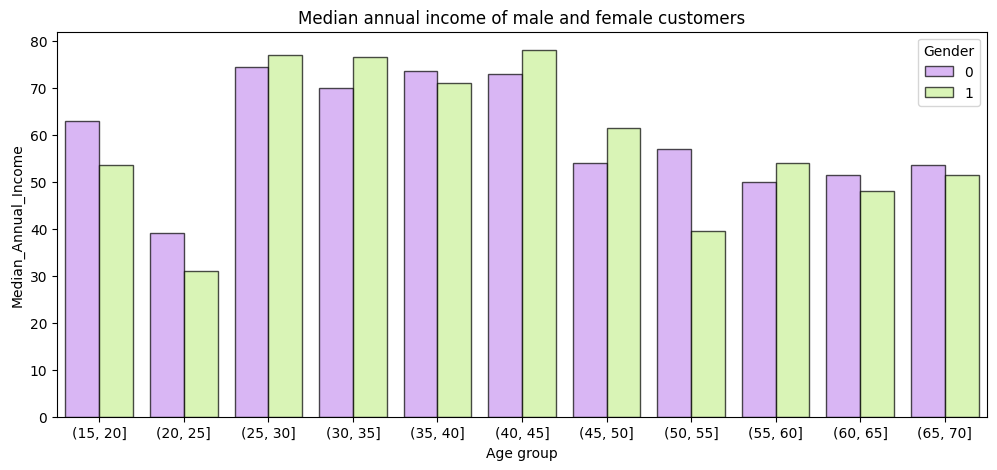

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(x='Age_group', y='Median_Annual_Income', hue='Gender', data=medians_by_age_group,
            palette=['#cc88ff', '#ccff88'],
            alpha=0.7, edgecolor='k',
            ax=ax)

ax.set_title("Median annual income of male and female customers")
ax.set_xlabel("Age group")


A bar chart above shows that the most wealthy customers are in age of 25-45 years old. The biggest difference between women and men is visible in age groups 25-30 (male more rich) and 40-45 (female more rich).




Text(0.5, 0, 'Age group')

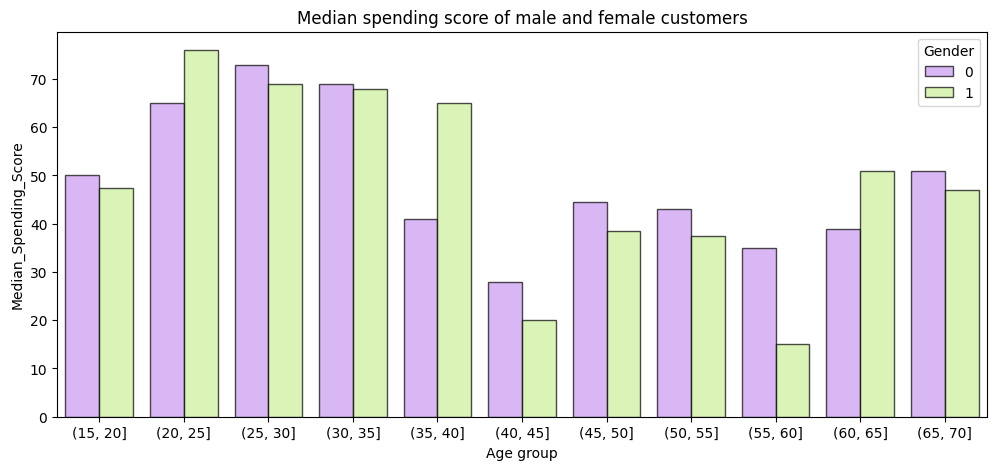

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(x='Age_group', y='Median_Spending_Score', hue='Gender', data=medians_by_age_group,
            palette=['#cc88ff', '#ccff88'],
            alpha=0.7, edgecolor='k',
            ax=ax)

ax.set_title("Median spending score of male and female customers")
ax.set_xlabel("Age group")

Text(65, 80, 'Pearson:  0.06')

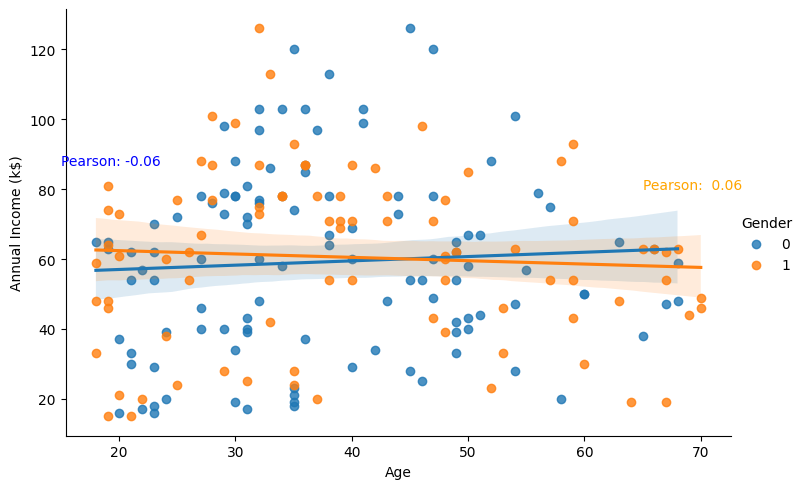

In [31]:
# # calculating pearsonr'c correlation
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age', 'Annual Income (k$)', data=df,hue='Gender', aspect=1.5)

plt.text(15,87, f'Pearson: {corr1 : .2f}', color='blue')
plt.text(65,80, f'Pearson: {corr2 : .2f}', color='orange')

There is a negligible linear correlation between age and annual income of customers for both gender.

Text(70, 25, 'Pearson: -0.38')

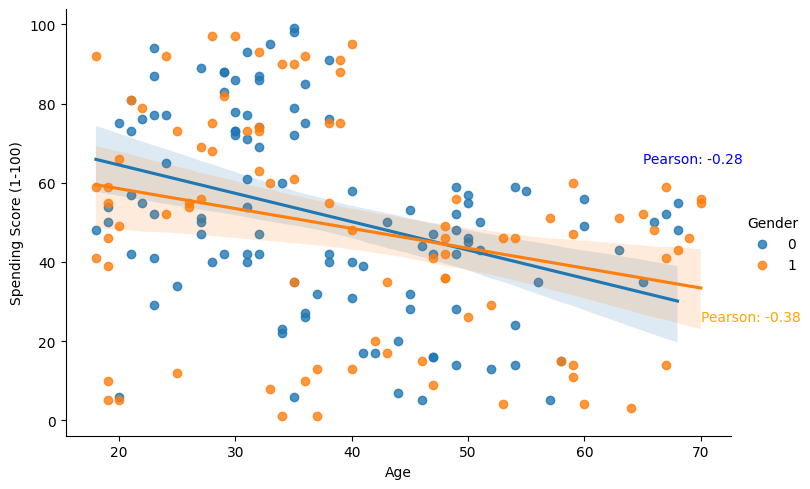

In [32]:
# calculating pearsonr'c correlation
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', data=df,hue='Gender', aspect=1.5)

plt.text(65,65, f'Pearson: {corr1 : .2f}', color='blue')
plt.text(70,25, f'Pearson: {corr2 : .2f}', color='orange')

There are week negative correlations (<0.5) between age and spending score for both gender. so, shows the as the increase in age there will be a decrease in spending score.

Text(130, 77, 'Pearson:  0.05')

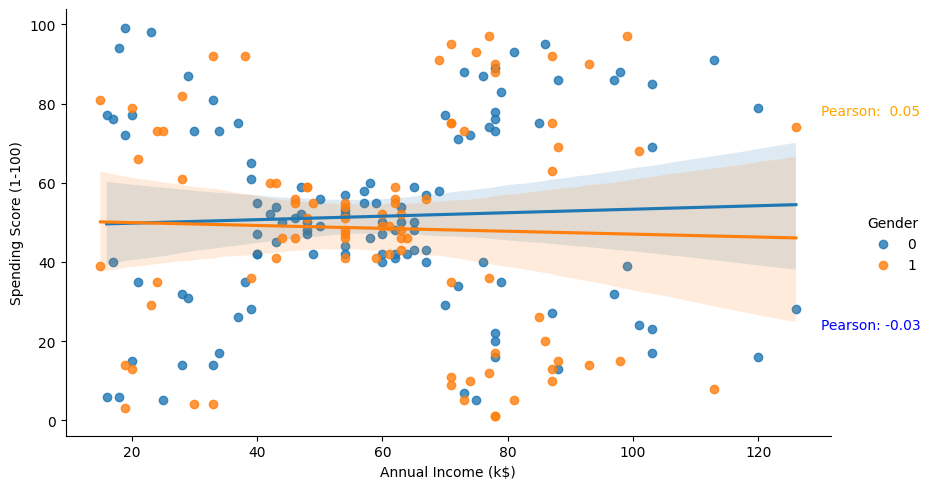

In [33]:
# calculating pearsonr'c correlation
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=df,hue='Gender', aspect=1.7)

plt.text(130,23, f'Pearson: {corr1 : .2f}', color='blue')
plt.text(130,77, f'Pearson: {corr2 : .2f}', color='orange')


There is a negligible correlation between annual income and spending score of customers for both gender.

# KMeans Clustring

###  Bivariate Clustering (Annual Income Vs Spending Score)

In [34]:
# Selecting Features for clustering

X = df[['Annual Income (k$)','Spending Score (1-100)']]

# X = df.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (198, 2)


Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [35]:
# Calculating Inertia of clusters and Silhouette Scores

n_clusters = range(2,11)  # number of clusters
wcss = []  # inertia of clusters  (Within Clusters with sum of squares)
silhouette_scores = []  # silhouette_score

for n in n_clusters:
    model1 = KMeans(n_clusters=n, init='k-means++')
    
    #TRAIN MODEL
    model1.fit(X)
    
    #CALCULATE INERTIA    
    wcss.append(model1.inertia_)  # data for elbow method
    
    #CALCULATE SILHOUETTE SCORE
    silhouette_avg = silhouette_score(X, model1.labels_)
    silhouette_scores.append(silhouette_avg)  
    
print("Inertia of clusters:",wcss[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia of clusters: [171005.53409090912, 101166.23927650372, 68497.65525388089]

Silhouette Scores: [0.2954488207074142, 0.46541758070184547, 0.497441782578338]


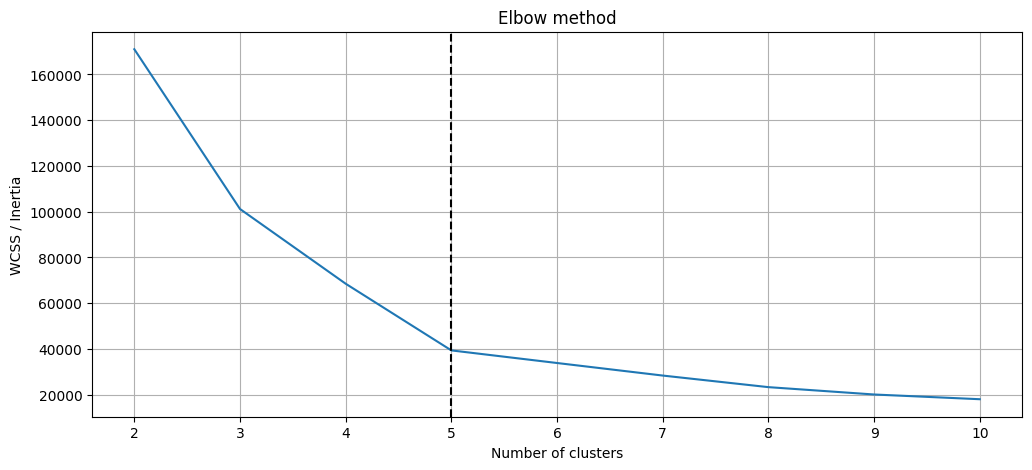

In [36]:
# Finding number of cluster based on Elbow Method

fig, ax = fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, wcss, markers='o', ax=ax)  
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("WCSS / Inertia")
ax.axvline(5, ls="--", c='k')
plt.grid()

# for i, score in enumerate(wcss):
#     ax.text(n_clusters[i], score, round(score, 2), ha='center', va='bottom')

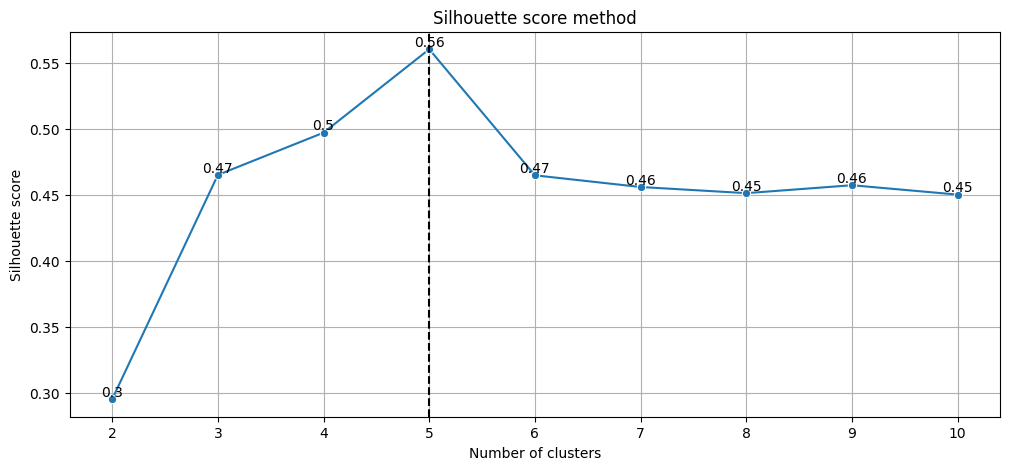

In [37]:
# Deciding number of clusters based on Silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, silhouette_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(5, ls="--", c='k')
plt.grid()

# silhouette score values on the chart
for i, score in enumerate(silhouette_scores):
    ax.text(n_clusters[i], score, round(score, 2), ha='center', va='bottom')

In [38]:
# Training and fitting the model with number of cluster 5.

# model1 = KMeans(n_clusters=5)
model1 = KMeans(n_clusters=5, init='k-means++')
label=model1.fit_predict(X)
km5_cluster=X.copy()
km5_cluster = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
km5_cluster['K-means cluster'] = model1.labels_
print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [39]:
# centroids of clusters

print(model1.cluster_centers_)

[[85.21052632 82.10526316]
 [25.72727273 79.36363636]
 [86.34285714 17.57142857]
 [55.0875     49.7125    ]
 [26.30434783 20.91304348]]


In [40]:

df

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group
0         1   19                  15                      39  (15, 20]
1         1   21                  15                      81  (20, 25]
2         0   20                  16                       6  (15, 20]
3         0   23                  16                      77  (20, 25]
4         0   31                  17                      40  (30, 35]
..      ...  ...                 ...                     ...       ...
193       0   38                 113                      91  (35, 40]
194       0   47                 120                      16  (45, 50]
195       0   35                 120                      79  (30, 35]
196       0   45                 126                      28  (40, 45]
197       1   32                 126                      74  (30, 35]

[198 rows x 5 columns]

In [41]:
# testing the model

model1.predict([[15,39]])

array([4])

Text(0.5, 1.0, 'K-Means Cluster Visualization')

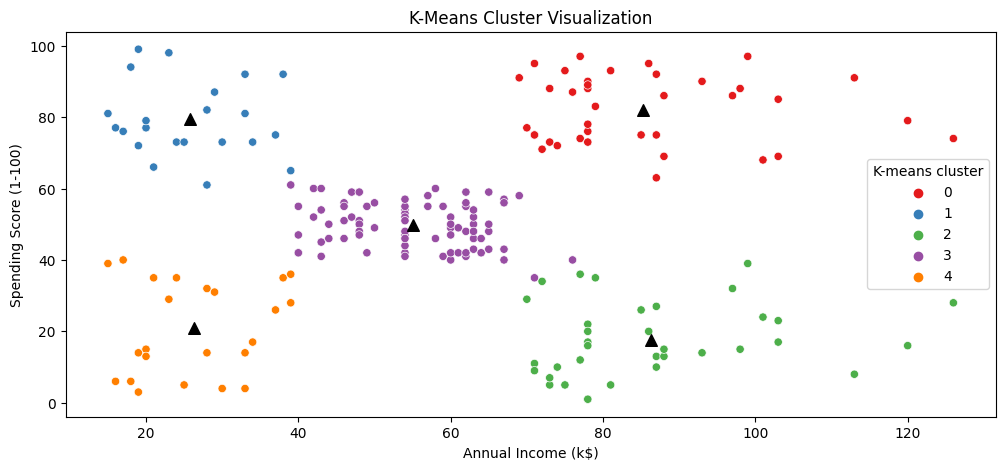

In [42]:
fig, ax = plt.subplots(figsize=(12, 5)) 

# Scatterplot for 'Annual Income' vs 'Spending Score'
scat1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=km5_cluster, 
                        hue='K-means cluster', ax=ax, palette='Set1', legend=1)
ax.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], marker='^', s=70, c='k')
plt.title("K-Means Cluster Visualization")

K-Means algorithm generated following 5 clusters:

1. Clients with low annual income and high spending score
2. Clients with medium annual income and medium spending score
3. Clients with high annual income and low spending score
4. Clients with high annual income and high spending score
5. Clients with low annual income and low spending score
    

In [43]:
KM5_clust_sizes = km5_cluster.groupby("K-means cluster").size().to_frame()
KM5_clust_sizes.columns=["KM5_size"]
KM5_clust_sizes

KM5_size
K-means cluster          
0                      38
1                      22
2                      35
3                      80
4                      23

In [44]:
df['K-means cluster'] = label
df
# km5_cluster

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group  \
0         1   19                  15                      39  (15, 20]   
1         1   21                  15                      81  (20, 25]   
2         0   20                  16                       6  (15, 20]   
3         0   23                  16                      77  (20, 25]   
4         0   31                  17                      40  (30, 35]   
..      ...  ...                 ...                     ...       ...   
193       0   38                 113                      91  (35, 40]   
194       0   47                 120                      16  (45, 50]   
195       0   35                 120                      79  (30, 35]   
196       0   45                 126                      28  (40, 45]   
197       1   32                 126                      74  (30, 35]   

     K-means cluster  
0                  4  
1                  1  
2                  4  
3                  1  
4                  4  
..               ...  
193                0  
194                2  
195                0  
196                2  
197                0  

[198 rows x 6 columns]

## Graphical User Interface  (Annual Income vs Spending Score)

In [45]:
# import joblib
# joblib.dump(model1,'Customer Segmentation')

# def show_entry_fields():
#     p1 = int(e1.get())
#     p2 = int(e2.get())
    
#     model = joblib.load('Customer Segmentation')
#     result = model.predict([[p1, p2]])
#     print("This customer belongs to cluster no:", result[0])
    
#     cluster_label = ''
#     if result[0] == 0:
#         cluster_label = 'Customer with medium annual income and medium spending score'
#     elif result[0] == 1:
#         cluster_label= 'Customer with high annual income and high spending score'
#     elif result[0] == 2:
#         cluster_label = 'Customer with high annual income and low spending score'
#     elif result[0] == 3:
#         cluster_label = 'Customer with low annual income and high spending score'
#     elif result[0] == 4:
#         cluster_label = 'Customer with low annual income and low spending score'
    
#     label.config(text=f'Customer Segmentation Prediction: Cluster {result[0]} - {cluster_label}')

# master = Tk()
# master.title("Customer Segmentation Prediction")

# label = Label(master, text='Customer Segmentation Prediction:', bg='black', fg='white')
# label.grid(row=0, columnspan=2)

# Label(master, text='Annual Income').grid(row=1)
# Label(master, text='Spending Score').grid(row=2)

# e1 = Entry(master)
# e2 = Entry(master)

# e1.grid(row=1, column=1)
# e2.grid(row=2, column=1)

# Button(master, text="Predict", command=show_entry_fields).grid()
# mainloop()


# Hierarchical Clustering

In [46]:
# Select the relevant columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
Y = X.copy()
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
dist = hierarchy.distance.pdist(X_scaled)
linkage = hierarchy.linkage(dist, method='ward')

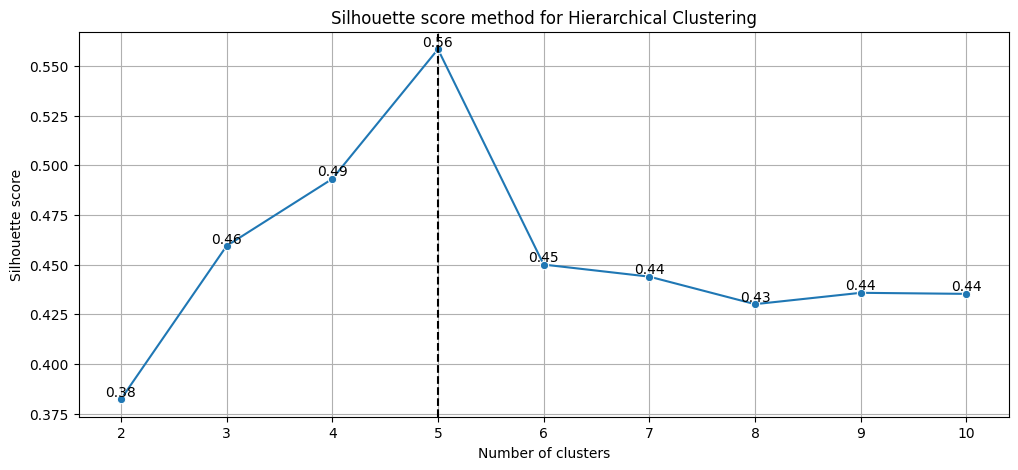

In [47]:
# Finding number of clusters

n_clusters = range(2, 11)  # number of clusters
silhouette_scores = []  # silhouette scores

for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n)
    model.fit(X_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, model.labels_)
    silhouette_scores.append(silhouette_avg)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(n_clusters, silhouette_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method for Hierarchical Clustering")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(5, ls="--", c='k')

# Add silhouette score values as text on the chart
for i, score in enumerate(silhouette_scores):
    ax.text(n_clusters[i], score, round(score, 2), ha='center', va='bottom')

plt.grid()




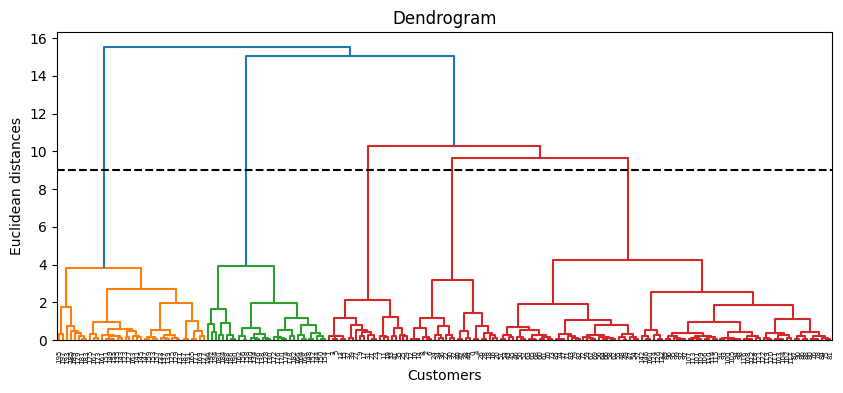

In [48]:
# Plot the dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 4))
dendrogram = hierarchy.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


# Creating a Threshold Line on the Dendrogram
threshold = 9  # Adjust the threshold value as desired
plt.axhline(y=threshold, color='k', linestyle='--')



In [49]:
# Training and Testing
# Determine the number of clusters based on the dendrogram
n_clusters = 5  # Adjust the number of clusters based on the dendrogram

# Perform agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agglomerative.fit_predict(X_scaled)

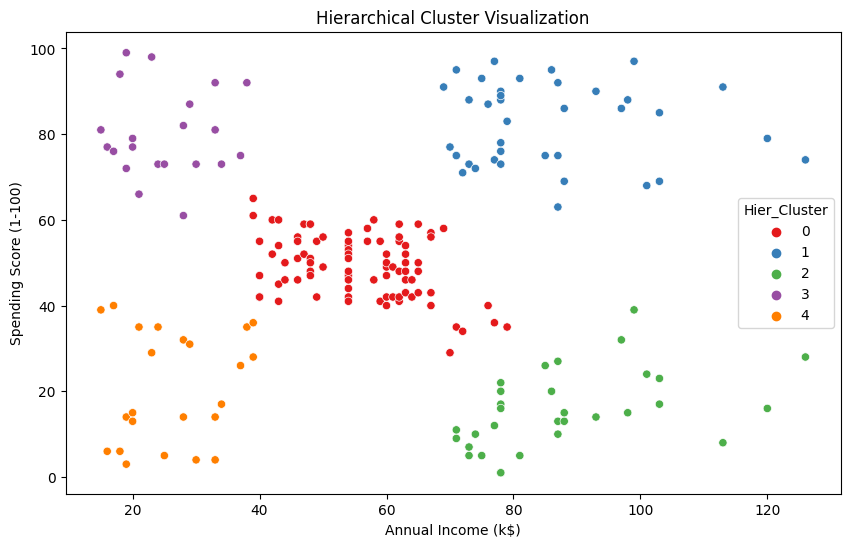

              Annual Income (k$)  Spending Score (1-100)
Hier_Cluster                                            
0                      55.811765               49.129412
1                      85.210526               82.105263
2                      87.870968               15.516129
3                      25.095238               80.047619
4                      26.304348               20.913043


In [50]:
# Add the cluster labels to the original dataset
df['Hier_Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hier_Cluster', palette='Set1')
plt.title('Hierarchical Cluster Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Cluster profiling
cluster_profiles = df.groupby('Hier_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profiles)

Hierarchical algorithm generated following 5 clusters:

1. Clients with low annual income and high spending score
2. Clients with medium annual income and medium spending score
3. Clients with high annual income and low spending score
4. Clients with high annual income and high spending score
5. Clients with low annual income and low spending score
    

In [51]:
Hier_clust_sizes = df.groupby('Hier_Cluster').size().to_frame()
Hier_clust_sizes.columns = ["Hier_Cluster"]
# print(Hier_clust_sizes)
Hier_clust_sizes

Hier_Cluster
Hier_Cluster              
0                       85
1                       38
2                       31
3                       21
4                       23

In [52]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group  \
0         1   19                  15                      39  (15, 20]   
1         1   21                  15                      81  (20, 25]   
2         0   20                  16                       6  (15, 20]   
3         0   23                  16                      77  (20, 25]   
4         0   31                  17                      40  (30, 35]   
..      ...  ...                 ...                     ...       ...   
193       0   38                 113                      91  (35, 40]   
194       0   47                 120                      16  (45, 50]   
195       0   35                 120                      79  (30, 35]   
196       0   45                 126                      28  (40, 45]   
197       1   32                 126                      74  (30, 35]   

     K-means cluster  Hier_Cluster  
0                  4             4  
1                  1             3  
2                  4             4  
3                  1             3  
4                  4             4  
..               ...           ...  
193                0             1  
194                2             2  
195                0             1  
196                2             2  
197                0             1  

[198 rows x 7 columns]

In [53]:
clusters = pd.concat([KM5_clust_sizes,Hier_clust_sizes],axis=1,sort=False)

In [54]:
#Comparing Results
clusters

KM5_size  Hier_Cluster
0        38            85
1        22            38
2        35            31
3        80            21
4        23            23

Both Clusters have same result.

In [55]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group  \
0       1   19                  15                      39  (15, 20]   
1       1   21                  15                      81  (20, 25]   
2       0   20                  16                       6  (15, 20]   
3       0   23                  16                      77  (20, 25]   
4       0   31                  17                      40  (30, 35]   

   K-means cluster  Hier_Cluster  
0                4             4  
1                1             3  
2                4             4  
3                1             3  
4                4             4

In [56]:
# save the file 
df.to_csv('Mall_Customers K_H.csv')